# LOADING THE DATA INTO THE REQUIRED DATAFRAME

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_aaup    = pd.read_csv('aaup.data', header=None)
df_usnews  = pd.read_csv('usnews.data', header=None)



In [143]:
columns_list=["FICE_(Federal_ID_number)",
"College_name",
"State_(postal_code)",
"Public/private_indicator_(public=1,private=2)",
"Average_Math_SAT_score",
"Average_Verbal_SAT_score",
"Average_Combined_SAT_score",
"Average_ACT_score",
"First_quartile-Math SAT",
"Third_quartile-Math SAT",
"First_quartile-Verbal SAT",
"Third_quartile-Verbal SAT",
"First_quartile-ACT",
"Third_quartile-ACT",
"Number_of_applications_received",
"Number_of_applicants_accepted",
"Number_of_new_students_enrolled",
"Pct._new_students from_top_10%of_H.S._class",
"Pct._new_students_from_top_25%_of_H.S._class",
"Number_of_fulltime_undergraduates",
"Number_of_parttime_undergraduates",
"In-state_tuition",
"Out-of-state_tuition",
"Room_and_board_costs",
"Room_costs",
"Board_costs",
"Additional_fees",
"Estimated_book_costs",
"Estimated_personal_spending",
"Pct._of_faculty_with_Ph.D.'s",
"Pct._of_faculty with_terminal_degree",
"Student/faculty_ratio",
"Pct.alumni_who_donate",
"Instructional_expenditure_per_int(student",
"Graduation_rate"]
# len(columns)
df_usnews.columns=columns_list



In [144]:
aaup_column_list=[" FICE (Federal ID number)",
"College_name",
"State_(postal_code)",
"Type_(I,IIA,or_IIB)",
"Average_salary-full_professors",
"Average_salary-associate_professors",
"Average_salary-assistant_professors",
"Average_salary-all_ranks",
"Average_compensation-full_professors",
"Average_compensation-associate_professors",
"Average_compensation-assistant_professors",
"Average_compensation-all_ranks",
"Number_of_full_professors",
"Number_of_associate_professors",
"Number_of_assistant_professors",
"Number_of_instructors",
"Number_of_faculty-all_ranks"]
df_aaup.columns=aaup_column_list
# df_aaup

In [145]:
for i in range(4,17):
    df_aaup.iloc[:,i]=pd.to_numeric(df_aaup.iloc[:,i],errors='coerce')
    a=df_aaup.iloc[:,i].mean()
    df_aaup.iloc[:,i]=df_aaup.iloc[:,i].fillna(a)

# df_aaup

C:\Users\omgup\AppData\Local\Temp\ipykernel_1576\954442362.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_aaup.iloc[:,i]=pd.to_numeric(df_aaup.iloc[:,i],errors='coerce')


In [146]:
for i in range(3,35):
    df_usnews.iloc[:,i]=pd.to_numeric(df_usnews.iloc[:,i],errors='coerce')
    a=df_usnews.iloc[:,i].mean()
    # for j in range(1302):
    df_usnews.iloc[:,i]=df_usnews.iloc[:,i].fillna(a)

# df_usnews

C:\Users\omgup\AppData\Local\Temp\ipykernel_1576\3096428320.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_usnews.iloc[:,i]=pd.to_numeric(df_usnews.iloc[:,i],errors='coerce')


# SCIENTIFIC QUESTIONS

In [147]:

df_usnews["Total_Expense"]=df_usnews["Room_and_board_costs"]+df_usnews["Room_costs"]+df_usnews["Board_costs"]+df_usnews["Additional_fees"]+df_usnews["Estimated_book_costs"]+df_usnews["Estimated_personal_spending"]
# df_usnews.sort_values("Total_Expense").tail(10)

Is expensive colleges has higher acceptance rate?

In [148]:
subset = df_usnews[['Number_of_applications_received', 'Number_of_applicants_accepted', 'Total_Expense']]
subset['Acceptance_Rate'] = subset['Number_of_applicants_accepted'] / subset['Number_of_applications_received']
subset['Acceptance_Rate(%)']=subset['Acceptance_Rate']*100
avg_acceptance_rate=subset["Acceptance_Rate"].mean()

C:\Users\omgup\AppData\Local\Temp\ipykernel_1576\3764346938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Acceptance_Rate'] = subset['Number_of_applicants_accepted'] / subset['Number_of_applications_received']
C:\Users\omgup\AppData\Local\Temp\ipykernel_1576\3764346938.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Acceptance_Rate(%)']=subset['Acceptance_Rate']*100


In [149]:
subset

,Number_of_applications_received,Number_of_applicants_accepted,Total_Expense,Acceptance_Rate,Acceptance_Rate(%)
0,193.0,146.000000,10670.000000,0.756477,75.647668
1,1852.0,1427.000000,10289.000000,0.770518,77.051836
2,146.0,117.000000,11224.000000,0.801370,80.136986
3,2065.0,1598.000000,12194.000000,0.773850,77.384988
4,2817.0,1920.000000,6605.000000,0.681576,68.157614
...,...,...,...,...,...
1297,1869.0,1870.683191,7950.000000,1.000901,100.090058
1298,9630.0,7801.000000,10951.277237,0.810073,81.007269
1299,1566.0,1400.000000,9492.012646,0.893997,89.399745
1300,903.0,755.000000,10682.012646,0.836102,83.610188


Text(0, 0.5, 'Number_of_applicants_accepted')

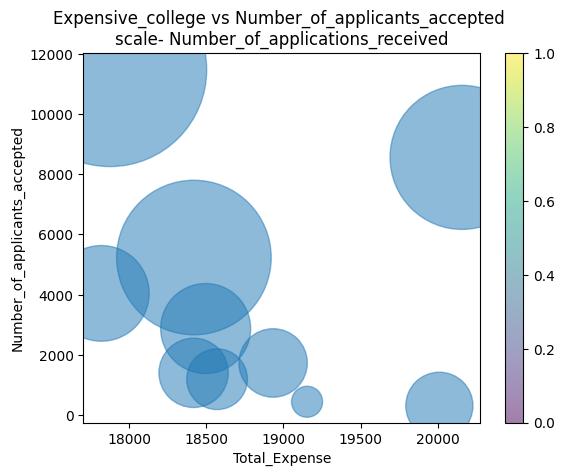

In [150]:
subset=subset.sort_values("Total_Expense").tail(10)
plt.scatter( subset['Total_Expense'],subset['Number_of_applicants_accepted'], s=subset['Number_of_applications_received'], alpha=0.5)
plt.colorbar()
plt.title('''Expensive_college vs Number_of_applicants_accepted 
scale- Number_of_applications_received''')
plt.xlabel("Total_Expense")
plt.ylabel("Number_of_applicants_accepted")

Text(0.5, 1.0, 'Expensive_college vs Acceptance_rate')

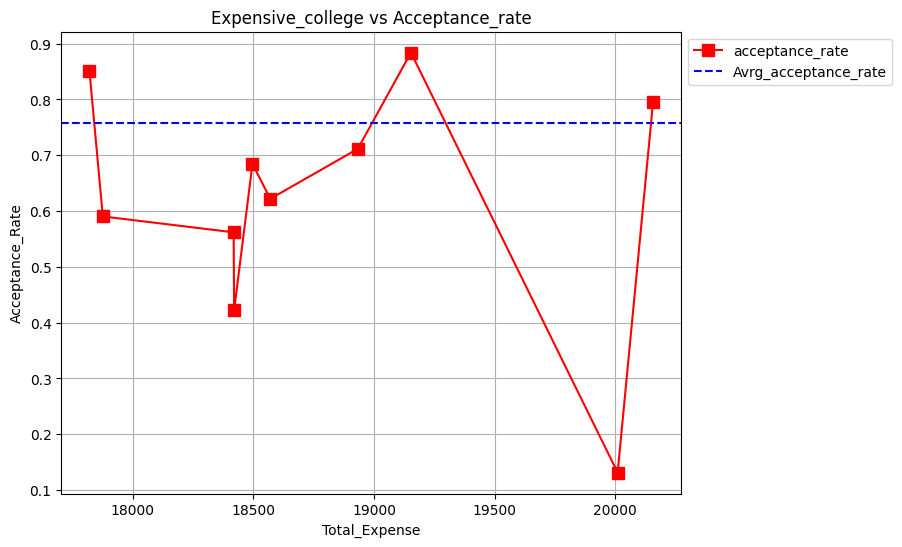

In [151]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(subset['Total_Expense'],subset['Acceptance_Rate'], marker='s', markersize=8,color="red",label="acceptance_rate")
ax.axhline(avg_acceptance_rate, color='b', linestyle='--',label="Avrg_acceptance_rate")
ax.grid(True)
plt.ylabel("Acceptance_Rate")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel("Total_Expense")
plt.title('''Expensive_college vs Acceptance_rate''')

Ranking the colleges on basis of their average scores

In [152]:
subset3=df_usnews.copy()
subset3['Weighted_Avg_Score'] = ((subset3['Average_Combined_SAT_score'] * subset3['Number_of_fulltime_undergraduates']) 
                             + (subset3['Average_ACT_score'] * subset3['Number_of_parttime_undergraduates']))/ (subset3['Number_of_fulltime_undergraduates'] + subset3['Number_of_parttime_undergraduates'])

subset3 = subset3.sort_values(by='Weighted_Avg_Score', ascending=False)

subset3['Rank'] = range(1, len(subset3)+1)

What is the correlation between the public and private sector?

Text(0, 0.5, 'Rank')

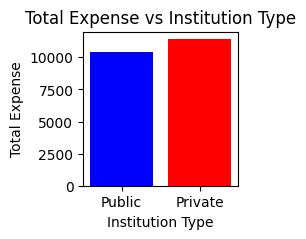

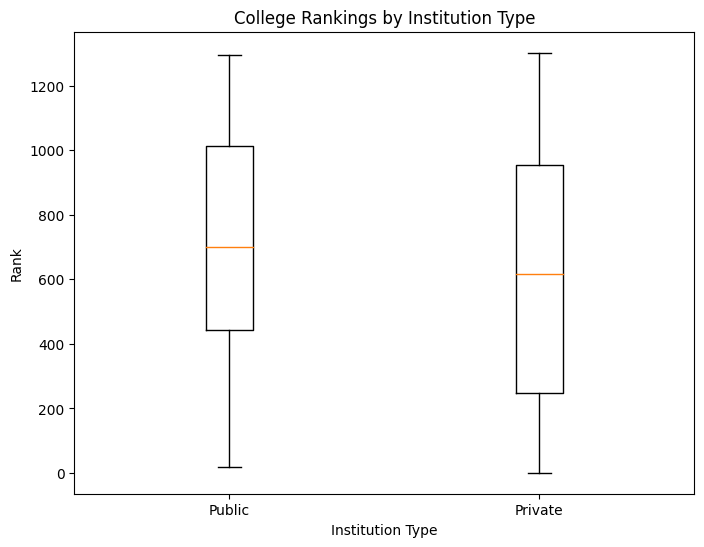

In [153]:
b=df_usnews.groupby("Public/private_indicator_(public=1,private=2)").Total_Expense.mean()
x_ax=["Public","Private"]
fig = plt.figure(figsize=(2,2))
plt.bar(x_ax,b,color=["b","r"])
plt.title("Total Expense vs Institution Type")
plt.xlabel("Institution Type")
plt.ylabel("Total Expense")
# ---------------------------------------

subset3["Public/private_indicator_(public=1,private=2)"] = subset3["Public/private_indicator_(public=1,private=2)"].apply(lambda x: "Public" if x == 1 else "Private")

plt.figure(figsize=(8,6))
plt.boxplot([subset3[subset3["Public/private_indicator_(public=1,private=2)"]=="Public"]["Rank"], subset3[subset3["Public/private_indicator_(public=1,private=2)"]=="Private"]["Rank"]], labels=["Public", "Private"])
plt.title("College Rankings by Institution Type")
plt.xlabel("Institution Type")
plt.ylabel("Rank")
# plt.legend()

# the graph shows public to be greater


What is corelation between the Total Expense and rank of colleges?

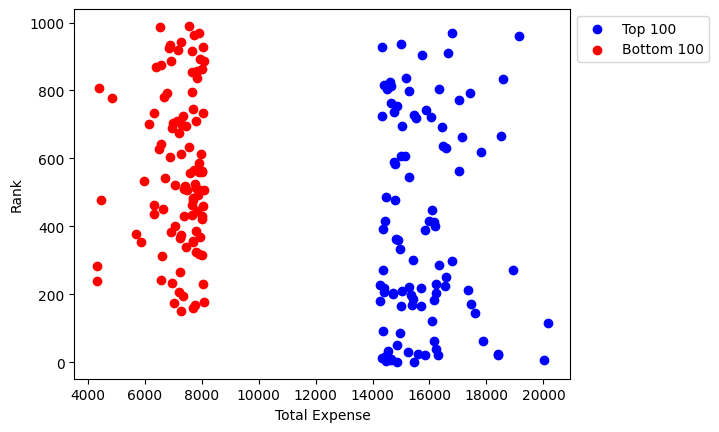

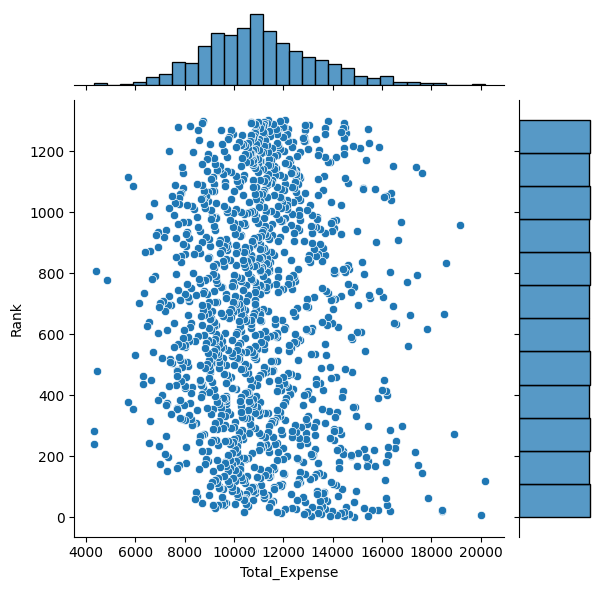

In [154]:
subset4 = subset3.sort_values('Total_Expense',ascending=False)

top_100 = subset4[subset4['Rank'] <= 1000].head(100)
bottom_100 = subset4[subset4['Rank'] <= 1000].tail(100)

plt.scatter(top_100['Total_Expense'],top_100['Rank'],  c='blue', label='Top 100')
plt.scatter(bottom_100['Total_Expense'],bottom_100['Rank'],  c='red', label='Bottom 100')

plt.ylabel('Rank')
plt.xlabel('Total Expense')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Create a joint plot of rank vs total_expense
sns.jointplot(x='Total_Expense', y='Rank', data=subset4)


# the graph clearly shows that the lower expenses have higher rank

From which states most colleges fall under the rank of 1000?

Text(0.5, 1.0, 'Mean Rank by state')

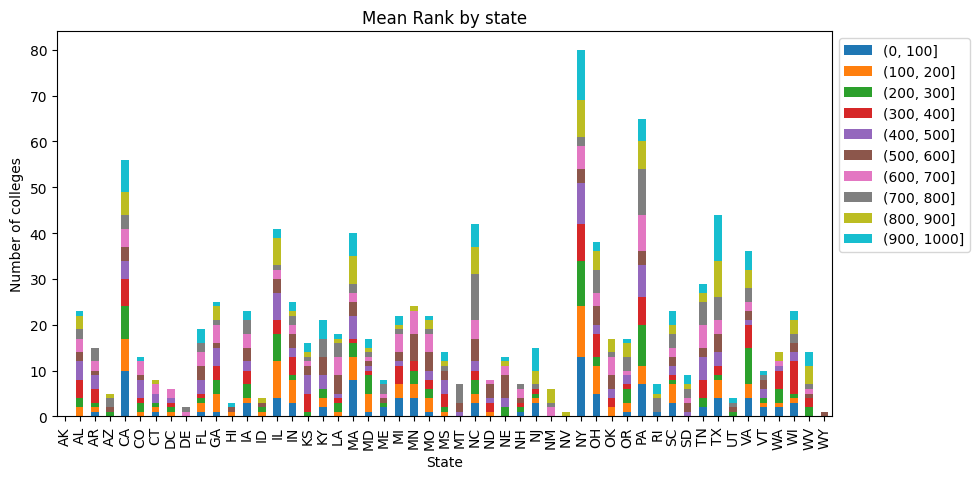

In [155]:

subset5=subset3.copy()
subset5['Ranking Range'] = pd.cut(subset5['Rank'], bins=[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])
grouped = subset5.groupby(['State_(postal_code)','Ranking Range'])['Rank'].count()
# grouped=grouped.sort_values("Rank")
table = grouped.unstack()
table.plot(kind='bar', stacked=True,figsize=(10, 5))
# print(grouped)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('State')
plt.ylabel('Number of colleges')
plt.title('Mean Rank by state')

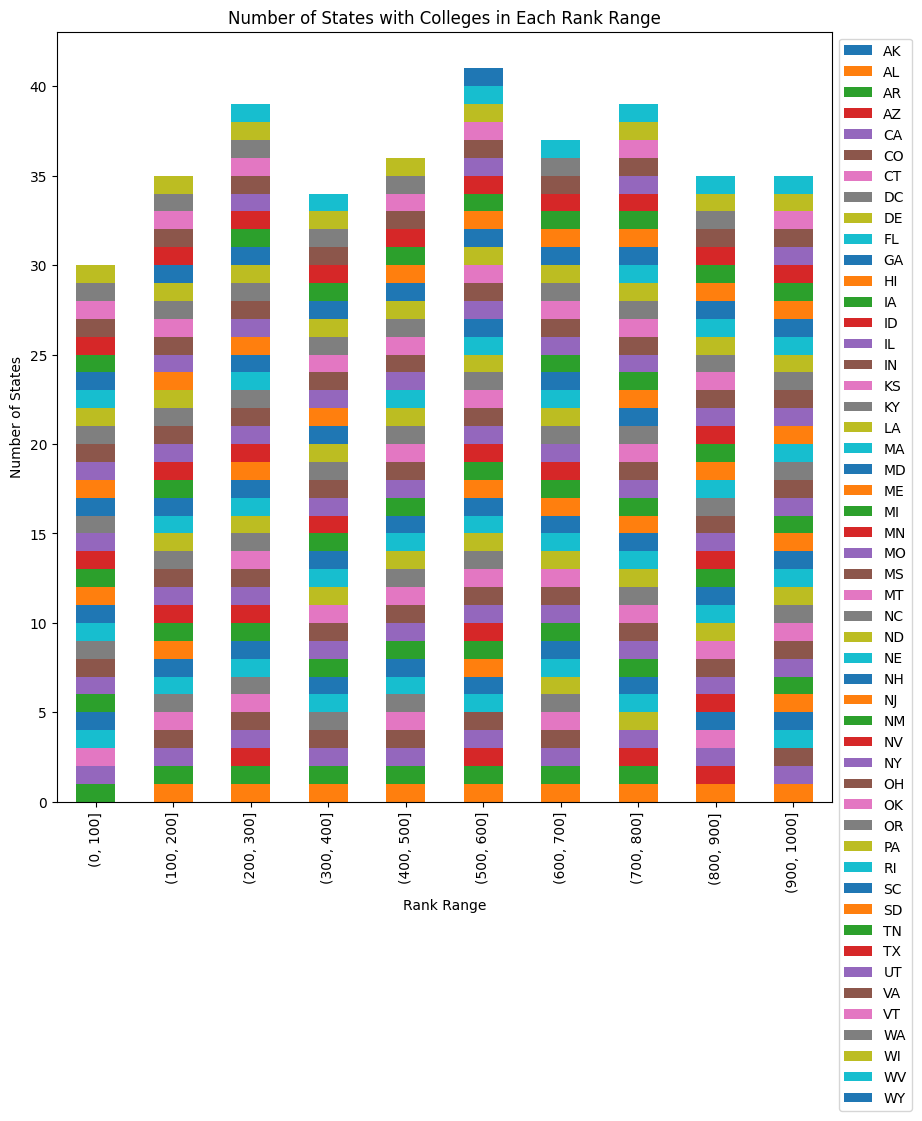

In [156]:

state_counts = subset5.groupby(["Ranking Range", 'State_(postal_code)'])['State_(postal_code)'].nunique()
# print(state_counts)
state_counts = state_counts.unstack()
# print(state_counts)
ax = state_counts.plot(kind='bar', stacked=True, figsize=(10, 10))
plt.title('Number of States with Colleges in Each Rank Range')
plt.xlabel('Rank Range')
plt.ylabel('Number of States')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

Trend between the increase no. of student vs  salary of faculties

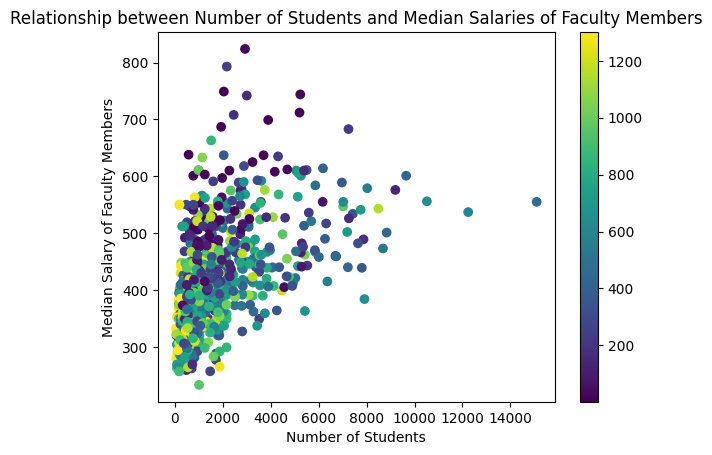

Correlation coefficient: 0.5298559456941248


,College_name,Number_of_faculty-all_ranks,Average_salary-all_ranks,Number_of_applicants_accepted,Rank
0,Alaska Pacific University,32,382,146.0,1294
1,University of Montevallo,127,388,892.0,447
2,Huntingdon College,44,301,520.0,658
3,Livingston University,89,300,957.0,324
4,University of Mobile,86,291,331.0,601
...,...,...,...,...,...
857,Shepherd College,115,342,1167.0,998
858,West Liberty State College,130,337,1062.0,382
859,West Virginia University,895,439,7801.0,361
860,Wheeling Jesuit College,65,315,755.0,845


In [157]:
aaup_df = df_aaup[['College_name', 'Number_of_faculty-all_ranks', 'Average_salary-all_ranks']]
usnews_df = subset3[['College_name', 'Number_of_applicants_accepted','Rank']]
merged_df = pd.merge(aaup_df,usnews_df, on='College_name')

corr_coef = merged_df['Number_of_applicants_accepted'].corr(merged_df['Average_salary-all_ranks'])

plt.scatter(merged_df['Number_of_applicants_accepted'], merged_df['Average_salary-all_ranks'], c=merged_df['Rank'], cmap='viridis')
plt.colorbar()
plt.xlabel('Number of Students')
plt.ylabel('Median Salary of Faculty Members')
plt.title('Relationship between Number of Students and Median Salaries of Faculty Members')
plt.show()

print("Correlation coefficient:", corr_coef)
merged_df

How does the average faculty salary vary across different types of institutions

C:\Users\omgup\AppData\Local\Temp\ipykernel_1576\1855718917.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  public_salaries = public.groupby('Number_of_full_professors').median()["Average_salary-full_professors"]
C:\Users\omgup\AppData\Local\Temp\ipykernel_1576\1855718917.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  private_salaries = private.groupby('Number_of_full_professors').median()["Average_salary-full_professors"]


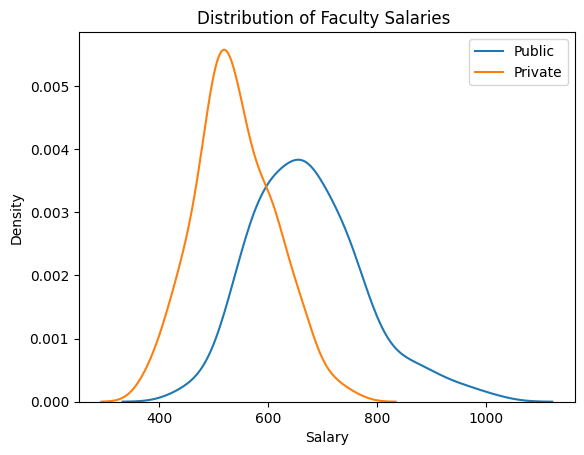

In [158]:
import seaborn as sns
public = df_aaup[df_aaup["Type_(I,IIA,or_IIB)"] == 'I']
private = df_aaup[df_aaup["Type_(I,IIA,or_IIB)"].isin(["IIA", "IIB"])]

public_salaries = public.groupby('Number_of_full_professors').median()["Average_salary-full_professors"]
private_salaries = private.groupby('Number_of_full_professors').median()["Average_salary-full_professors"]

sns.kdeplot(public_salaries, label='Public')
sns.kdeplot(private_salaries, label='Private')
# sns.kdeplot(type_IIB_salaries, label='Type_IIB')
plt.xlabel('Salary')
plt.title('Distribution of Faculty Salaries ')
plt.legend()


How does the salaries of professors vary with their ranks?

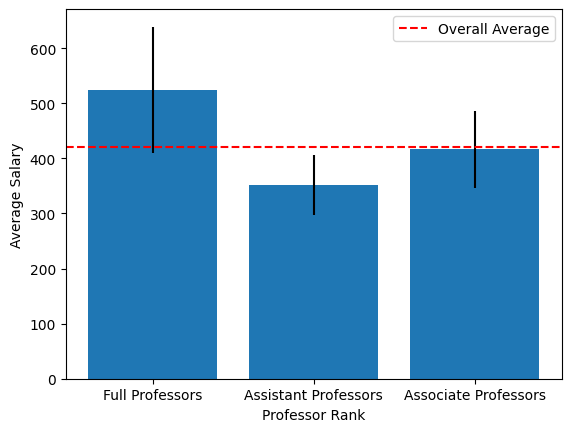

In [159]:
avg_salary_full = df_aaup["Average_salary-full_professors"].mean()
std_salary_full = df_aaup["Average_salary-full_professors"].std()
avg_salary_assistant = df_aaup["Average_salary-assistant_professors"].mean()
std_salary_assistant = df_aaup["Average_salary-assistant_professors"].std()
avg_salary_associate = df_aaup["Average_salary-associate_professors"].mean()
std_salary_associate = df_aaup["Average_salary-associate_professors"].std()

# Calculate the overall average salary across all ranks
avg_salary_all = df_aaup["Average_salary-all_ranks"].mean()

fig, ax = plt.subplots()
ax.bar(["Full Professors", "Assistant Professors","Associate Professors"], [avg_salary_full, avg_salary_assistant,avg_salary_associate], yerr=[std_salary_full, std_salary_assistant,std_salary_associate])
ax.set_xlabel("Professor Rank")
ax.set_ylabel("Average Salary")
ax.axhline(avg_salary_all, color='red', linestyle='--', label="Overall Average")
ax.legend()
plt.show()

How does the average salary of professors vary in different states?

<AxesSubplot: xlabel='State_(postal_code)', ylabel='Average_salary-all_ranks'>

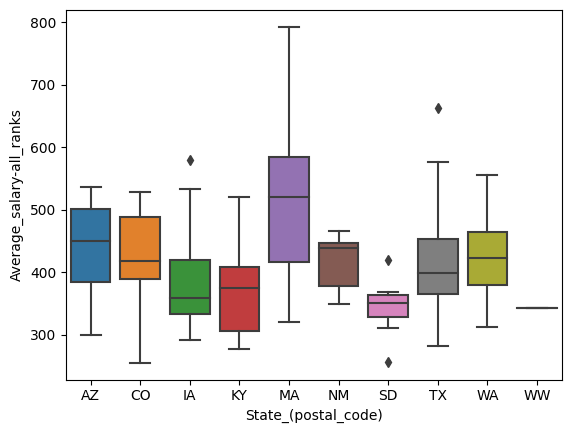

In [160]:
subset_data = df_aaup[["Average_salary-all_ranks", "State_(postal_code)"]]
all_regions=df_aaup["State_(postal_code)"].unique()

np.random.seed(42) # set seed 
chosen_regions = np.random.choice(all_regions, size=10, replace=False)

subset_data = subset_data[subset_data["State_(postal_code)"].isin(chosen_regions)]

# Create a boxplot to visualize the median salaries by region
sns.boxplot(x="State_(postal_code)", y="Average_salary-all_ranks", data=subset_data)


Is there any coorelation between the number of faculty and their average compensation for every college?

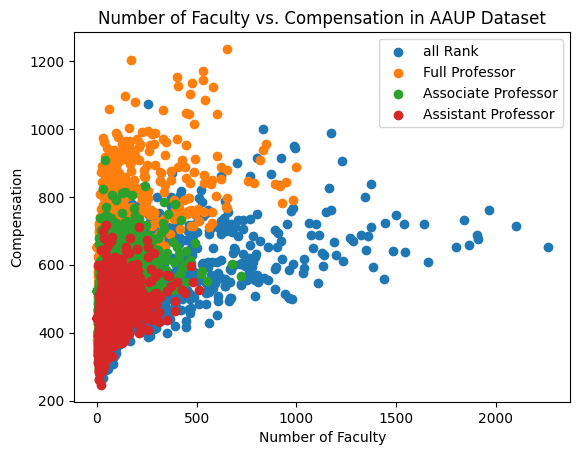

In [161]:
df_all_rank = df_aaup[['Number_of_faculty-all_ranks', 'Average_compensation-all_ranks']]
df_full = df_aaup[['Number_of_full_professors', 'Average_compensation-full_professors']]
df_associate = df_aaup[['Number_of_associate_professors', 'Average_compensation-associate_professors']]
df_assisatnt = df_aaup[['Number_of_assistant_professors', 'Average_compensation-assistant_professors']]

plt.scatter(x=df_all_rank['Number_of_faculty-all_ranks'], y=df_all_rank['Average_compensation-all_ranks'],label="all Rank")
plt.scatter(x=df_full['Number_of_full_professors'], y=df_full['Average_compensation-full_professors'],label="Full Professor")
plt.scatter(x=df_associate['Number_of_associate_professors'], y=df_associate['Average_compensation-associate_professors'],label="Associate Professor")
plt.scatter(x=df_assisatnt['Number_of_assistant_professors'], y=df_assisatnt['Average_compensation-assistant_professors'],label="Assistant Professor")
plt.xlabel('Number of Faculty')
plt.ylabel('Compensation')
plt.title('Number of Faculty vs. Compensation in AAUP Dataset')
plt.legend()
# df_plot

Given that a college is private, what is the probability that its acceptance rate is below 50%

In [185]:
subset6= pd.merge(df_usnews,subset ,on='Number_of_applicants_accepted')
# df_usnews
# subset6.columns

In [186]:

total_below_50 = len(subset6[subset6["Acceptance_Rate(%)"] < 50])
total_colleges = len(subset6)
p_below_50 = total_below_50 / total_colleges

private_colleges = subset6[subset6['Public/private_indicator_(public=1,private=2)'] == 2]
p_private = len(private_colleges) / total_colleges

private_below_50 = private_colleges[private_colleges['Acceptance_Rate(%)'] < 50]
p_private_below_50 = len(private_below_50) / total_colleges

p_below_50_private = p_private_below_50 * p_below_50 / p_private

print("The probability of a private college having an acceptance rate below 50% is:", p_below_50_private)

The probability of a private college having an acceptance rate below 50% is: 0.03333333333333333
